In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
matrix_height = 500
matrix_width = 500
px_size = 5 * 10 ** -3  # mm
nu_min = 0
nu_max = 100  # 1/mm

In [3]:
nu_descr = 1 / px_size
nu_min /= nu_descr
nu_max /= nu_descr
nu_descr, nu_min, nu_max

(200.0, 0.0, 0.5)

In [4]:
nu_h_1d_grid = np.arange(nu_min, nu_max + 0.1, nu_max/5)
nu_h_1d_grid

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [5]:
H = 1 - np.sin(np.pi * nu_h_1d_grid)
H

array([1.        , 0.69098301, 0.41221475, 0.19098301, 0.04894348,
       0.        ])

In [6]:
filter_matrix = np.array([[2 * np.cos(i * 2 * np.pi * nu_0) for i in range(1, 5 + 1, 1)] for nu_0 in nu_h_1d_grid])
filter_matrix

array([[ 2.        ,  2.        ,  2.        ,  2.        ,  2.        ],
       [ 1.61803399,  0.61803399, -0.61803399, -1.61803399, -2.        ],
       [ 0.61803399, -1.61803399, -1.61803399,  0.61803399,  2.        ],
       [-0.61803399, -1.61803399,  1.61803399,  0.61803399, -2.        ],
       [-1.61803399,  0.61803399,  0.61803399, -1.61803399,  2.        ],
       [-2.        ,  2.        , -2.        ,  2.        , -2.        ]])

In [7]:
filter_matrix = np.c_[np.ones(6), filter_matrix]
filter_matrix

array([[ 1.        ,  2.        ,  2.        ,  2.        ,  2.        ,
         2.        ],
       [ 1.        ,  1.61803399,  0.61803399, -0.61803399, -1.61803399,
        -2.        ],
       [ 1.        ,  0.61803399, -1.61803399, -1.61803399,  0.61803399,
         2.        ],
       [ 1.        , -0.61803399, -1.61803399,  1.61803399,  0.61803399,
        -2.        ],
       [ 1.        , -1.61803399,  0.61803399,  0.61803399, -1.61803399,
         2.        ],
       [ 1.        , -2.        ,  2.        , -2.        ,  2.        ,
        -2.        ]])

In [8]:
h = np.matmul(H, np.linalg.inv(filter_matrix))
h

array([0.23431242, 0.31755705, 0.14813053, 0.12452373, 0.11755705,
       0.05791922])

In [9]:
h_1d = np.concatenate((h, h[4::-1]))
h_1d

array([0.23431242, 0.31755705, 0.14813053, 0.12452373, 0.11755705,
       0.05791922, 0.11755705, 0.12452373, 0.14813053, 0.31755705,
       0.23431242])

In [10]:
h0, h1, h2, h3, h4, h5 = h
h_2d = np.array([
    [h5, h5, h5, h5, h5, h5, h5, h5, h5, h5, h5],
    [h5, h4, h4, h4, h4, h4, h4, h4, h4, h4, h5],
    [h5, h4, h3, h3, h3, h3, h3, h3, h3, h4, h5],
    [h5, h4, h3, h2, h2, h2, h2, h2, h3, h4, h5],
    [h5, h4, h3, h2, h1, h1, h1, h2, h3, h4, h5],
    [h5, h4, h3, h2, h1, h0, h1, h2, h3, h4, h5],
    [h5, h4, h3, h2, h1, h1, h1, h2, h3, h4, h5],
    [h5, h4, h3, h2, h2, h2, h2, h2, h3, h4, h5],
    [h5, h4, h3, h3, h3, h3, h3, h3, h3, h4, h5],
    [h5, h4, h4, h4, h4, h4, h4, h4, h4, h4, h5],
    [h5, h5, h5, h5, h5, h5, h5, h5, h5, h5, h5]
])

In [11]:
def triangle(z:np.ndarray, a:int=0, b:int=2, c:int=4):
    z[z == a] = 0
    z[z == c] = 0
    first_half = np.logical_and(a < z, z <= b)
    z[first_half] = (z[first_half]-a) / (b-a)
    second_half = np.logical_and(b < z, z < c)
    z[second_half] = (c-z[second_half]) / (c-b)

triangle_slice = np.arange(0, matrix_width, dtype=np.float64)
triangle(triangle_slice, 69, 115, 161)
triangle(triangle_slice, 207, 253, 299)
triangle(triangle_slice, 345, 391, 437)
triangle_slice[0:69] = 0
triangle_slice[161:207] = 0
triangle_slice[299:345] = 0
triangle_slice[437:matrix_width] = 0

In [12]:
triangle_image = np.zeros((triangle_slice.shape[0], triangle_slice.shape[0]))
for i in range(0, triangle_slice.shape[0]):
    for j in range(0, triangle_slice.shape[0]):
        triangle_image[i, j] = triangle_slice[i] * triangle_slice[j]

In [13]:
normalized_triangle_image = ((triangle_image - triangle_image.min()) * (1 / (triangle_image.max() - triangle_image.min()) * 255)).astype('uint8')

In [14]:
def convolve2d(f, g):
    f_x, f_y = f.shape
    g_x, g_y = g.shape

    result = np.zeros((f_x + g_x - 1, f_y + g_y - 1))

    for i in range(0, f_x):
        for j in range(0, f_y):
            result[i:i+g_x,j:j+g_y] += f[i,j]*g

    return result

In [15]:
result = convolve2d(triangle_image, h_2d)
normalized_result = ((result - result.min()) * (1 / (result.max() - result.min()) * 255)).astype('uint8')

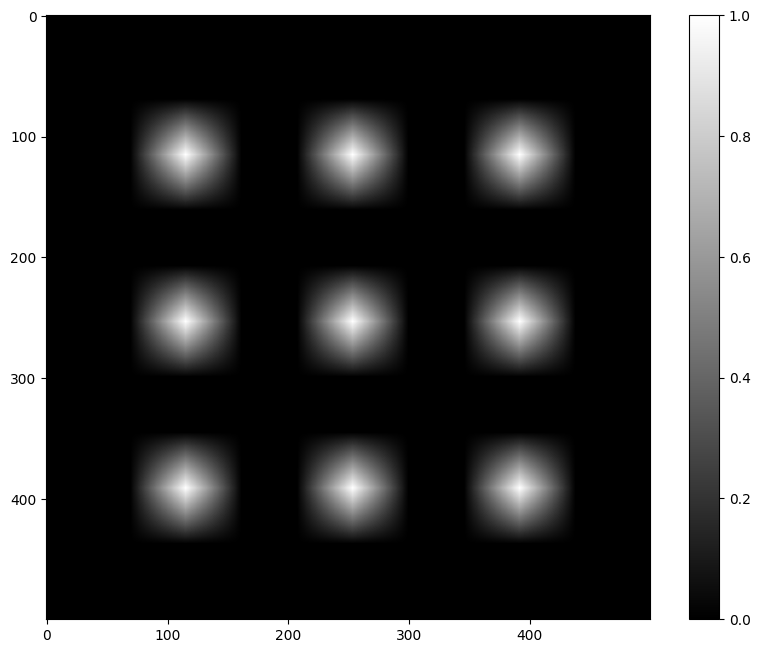

In [18]:
figure(figsize=(10, 8), dpi=100)
plt.imshow(triangle_image, cmap='gray')
plt.colorbar()
plt.show()

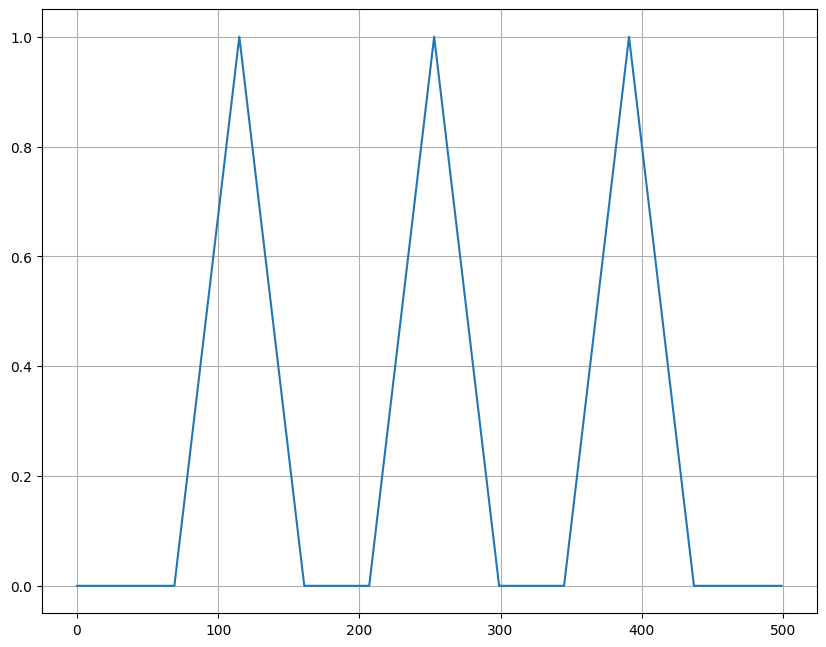

In [17]:
figure(figsize=(10, 8), dpi=100)
plt.plot(triangle_slice)
plt.grid(True)
plt.show()